### Face Recognition using SVMs



In [ ]:
# Let's import the required libraries
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#### Data Observation. Cleaning

In [2]:
faces = fetch_lfw_people(min_faces_per_person = 100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


#### Data Vlisualization


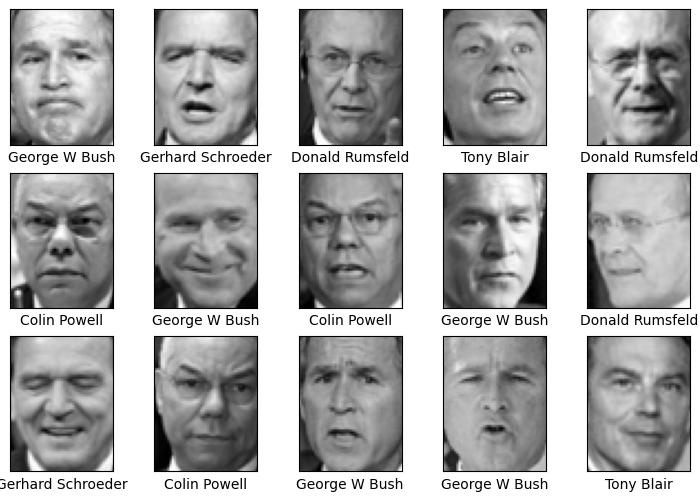

In [3]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9,6)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### Data Preprocessing

In [4]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

#### Data Modeling

In [5]:
model = SVC(class_weight='balanced')
model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [6]:
linear = SVC(kernel = 'linear', class_weight='balanced')
linear.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [7]:
poly = SVC(kernel = 'poly', class_weight='balanced')
poly.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='poly')

In [8]:
rbf = SVC(kernel = 'rbf', class_weight = 'balanced')
rbf.fit(x_train, y_train)

SVC(class_weight='balanced')

#### Evaluation

In [9]:
yfit = model.predict(x_test)

linear_fit = linear.predict(x_test)
poly_fit = poly.predict(x_test)
rbf_fit = rbf.predict(x_test)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

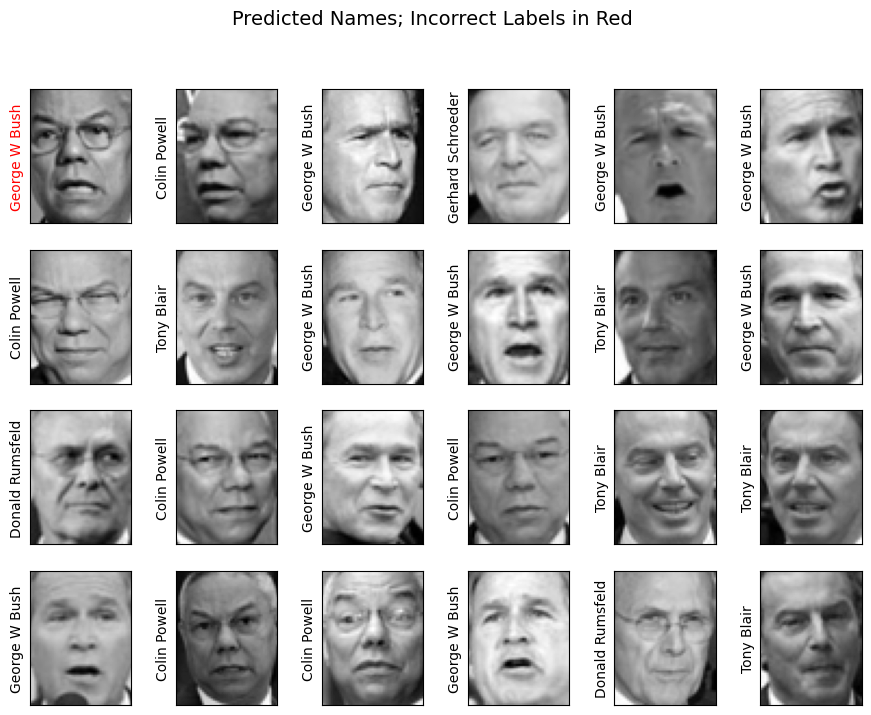

In [10]:
fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]],
                   color='black' if yfit[i] == y_test[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Text(0.5, 0.98, 'Linear Kernel Predicted Names; Incorrect Labels in Red')

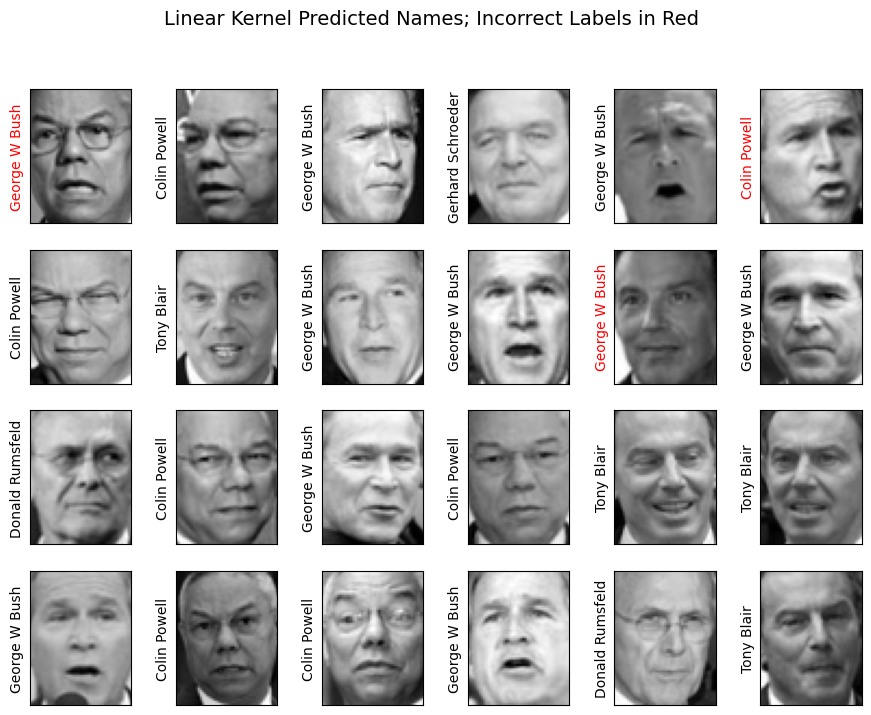

In [11]:
# linear kernel

fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[linear_fit[i]],
                   color='black' if linear_fit[i] == y_test[i] else 'red')

fig.suptitle('Linear Kernel Predicted Names; Incorrect Labels in Red', size=14)

Text(0.5, 0.98, 'Poly Kernel Predicted Names; Incorrect Labels in Red')

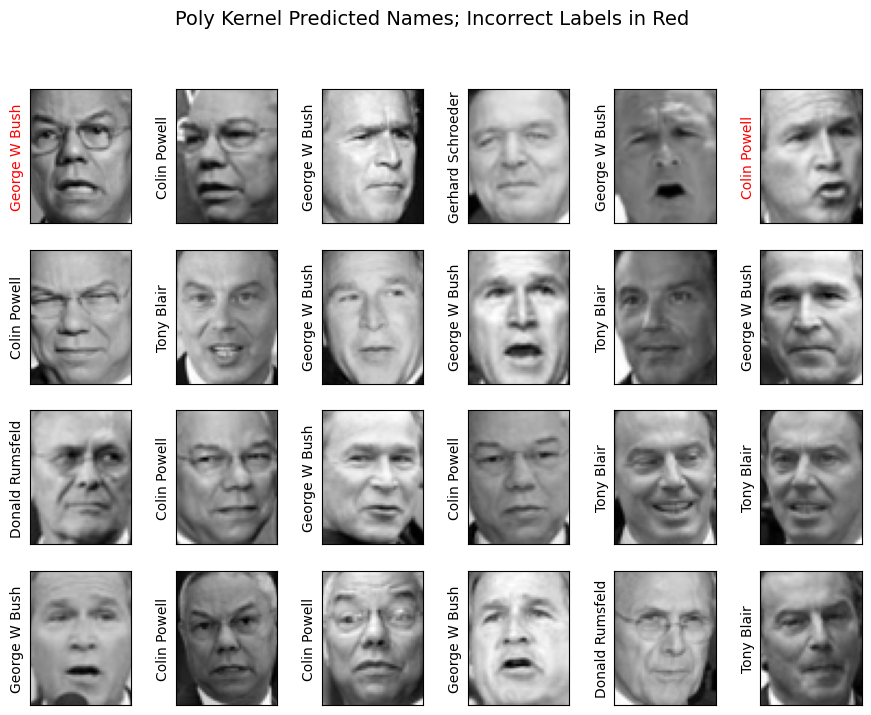

In [12]:
# poly  kernel

fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[poly_fit[i]],
                   color='black' if poly_fit[i] == y_test[i] else 'red')

fig.suptitle('Poly Kernel Predicted Names; Incorrect Labels in Red', size=14)

Text(0.5, 0.98, 'RBF Kernel Predicted Names; Incorrect Labels in Red')

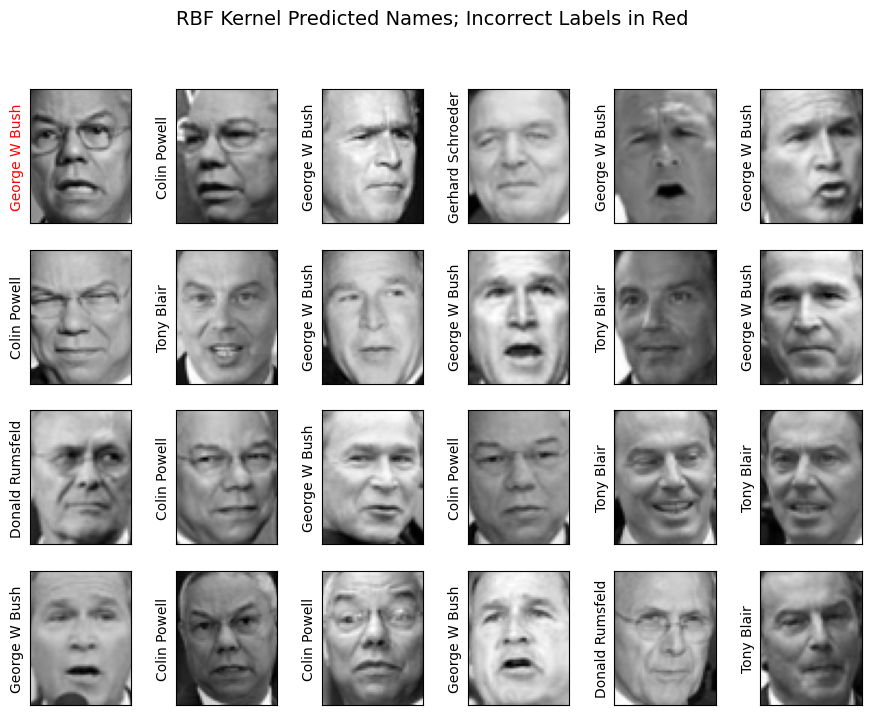

In [13]:
# RBF kernel

fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[rbf_fit[i]],
                   color='black' if rbf_fit[i] == y_test[i] else 'red')

fig.suptitle('RBF Kernel Predicted Names; Incorrect Labels in Red', size=14)

In [14]:
# Evaluating the model - Classification Report

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285



#### test min_faces_per_person = 50

                          precision   recall  f1-score   support

        Ariel Sharon       0.65      0.81      0.72        16
        Colin Powell       0.78      0.85      0.81        66
      Donald Rumsfeld       0.63      0.70      0.67        27
        George W Bush       0.91      0.73      0.81       140
    Gerhard Schroeder       0.64      0.67      0.65        24
          Hugo Chavez       0.76      0.76      0.76        17
      Jacques Chirac       0.54      0.70      0.61        10
        Jean Chretien       0.92      0.79      0.85        14
        John Ashcroft       0.67      0.88      0.76        16
    Junichiro Koizumi       0.75      0.82      0.78        11
      Serena Williams       0.80      0.89      0.84         9
          Tony Blair       0.65      0.75      0.70        40

            accuracy                           0.76       390
            macro avg       0.73      0.78      0.75       390
        weighted avg       0.78      0.76      0.77       390



In [15]:
# Evaluating the model - Classification Report

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285



In [16]:
# Evaluate Linear Model predictions
print("\nLinear Model Classification Report:")
print(classification_report(y_test, linear_fit, target_names=faces.target_names))

# Evaluate Polynomial Model predictions
print("\nPolynomial Model Classification Report:")
print(classification_report(y_test, poly_fit, target_names=faces.target_names))



Linear Model Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.89      0.78      0.83        32
    George W Bush       0.87      0.91      0.89       127
Gerhard Schroeder       0.89      0.86      0.88        29
       Tony Blair       0.88      0.85      0.86        33

         accuracy                           0.88       285
        macro avg       0.88      0.86      0.87       285
     weighted avg       0.88      0.88      0.88       285


Polynomial Model Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.88      0.89      0.88        64
  Donald Rumsfeld       0.86      0.78      0.82        32
    George W Bush       0.88      0.92      0.90       127
Gerhard Schroeder       0.85      0.76      0.80        29
       Tony Blair       0.84      0.82      0.83        33

         accuracy               

In [17]:
# Evaluate RBF Model predictions
print("\nRBF Model Classification Report:")
print(classification_report(y_test, rbf_fit, target_names=faces.target_names))


RBF Model Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285



Text(50.72222222222221, 0.5, 'Predicted')

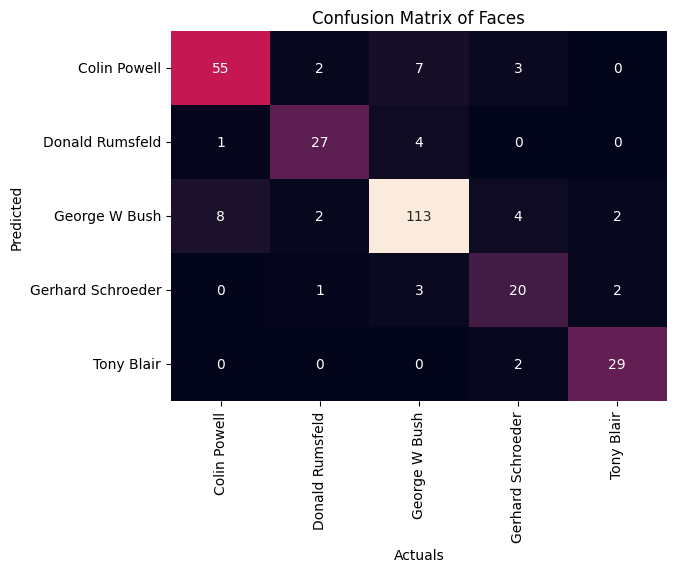

In [18]:
# confusion matrix

conf_mat = confusion_matrix(y_test, yfit)

# Plotting the heatmap
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.title('Confusion Matrix of Faces')
plt.xlabel('Actuals')
plt.ylabel('Predicted')

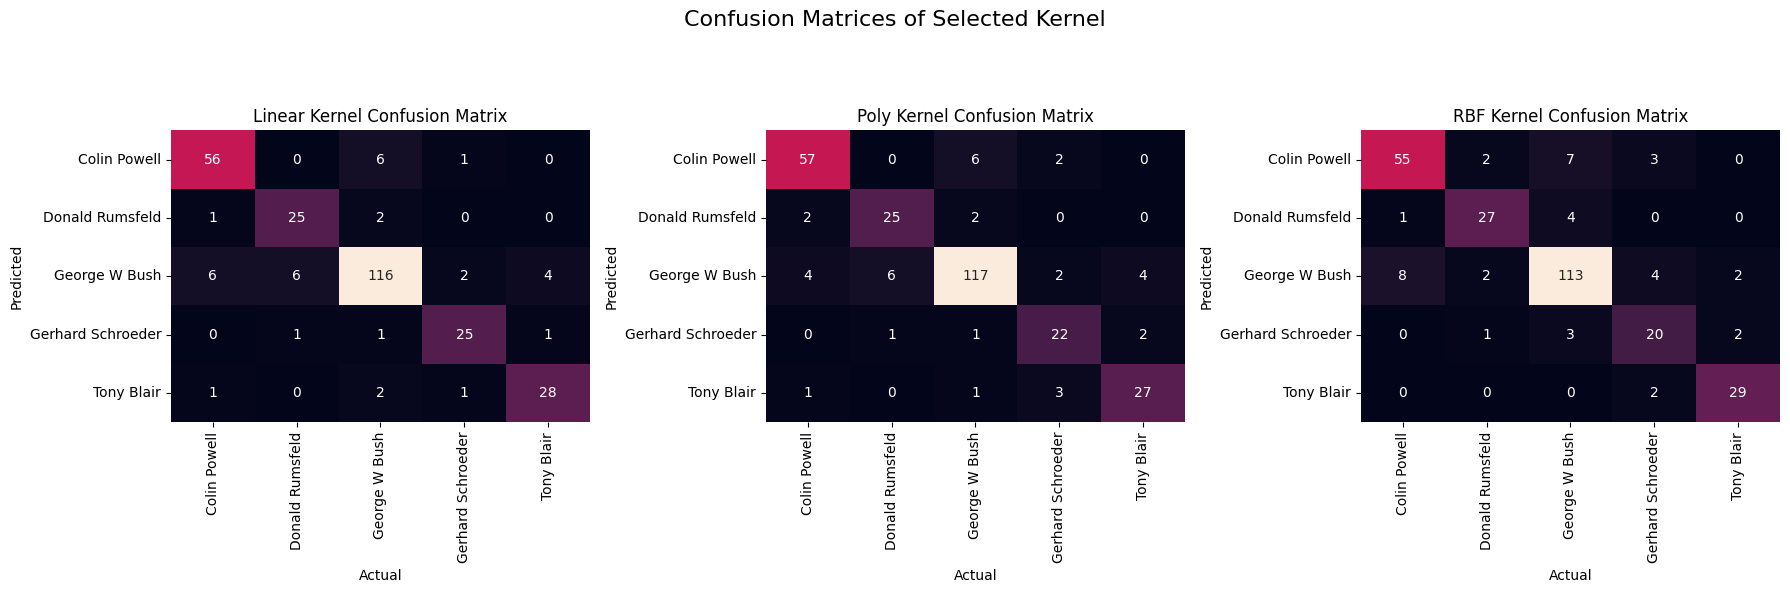

In [ ]:
# Define model predictions and their labels
models = [('Linear Kernel', linear_fit), ('Poly Kernel', poly_fit), ('RBF Kernel', rbf_fit)]

# Set up subplots for each model's confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confusion Matrices of Selected Kernel', size=16)

# Plot confusion matrix heatmap for each model
for ax, (title, predictions) in zip(axes, models):
    conf_mat = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
                xticklabels=faces.target_names,
                yticklabels=faces.target_names, ax=ax)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


This helps us get a sense of which labels are likely to be confused by the estimator.

#### Questions:

Q1: How many different people are in the dataset?
-  5 ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Tony Blair'].
    
Q2: What are the dimensions of each image in the dataset?
-  The dimensions is fig.set_size_inches(9,6) or 8, 6.

Q3: What are your observations about the variations in facial images (e.g., lighting, pose)?
-  The image is taken in front aspect, despite the faciel expressions are looking on either left/right side, the color is black and white. Moreover, facial features and  expressions are relatively distinct on each people.

Q4: Why is it important to split the data into training and testing sets?
- it is important to split data for training to used it for train the model that will be use for prediction. While, the remaining test data is to verify the effectiveness of model if it is accurate or not.

Q5: What does the parameter class_weight='balanced' do in this context?
- The parameter class_weight='balanced' automatically adjusts the weights inversely proportional to the class frequencies in the input data. Useful in datasets with imbalanced classes.
    


Q6: How does the model’s performance look based on the visualization? What can you infer from the incorrect predictions (marked in red)?
-  Based on the chart only 1 image is marked red, which validates that the model is accurate to predict the faces of different people
    
Q7: What do precision, recall, and F1-score mean in the context of this model?
- Precision measures the accuracy of positive predictions, indicating how many of the predicted faces were actually correct. 
- Recall measures the model's ability to identify all actual positive instances, reflecting how well it finds all instances of a particular person. 
- The F1-score balances precision and recall, providing a single metric that considers both false positives and false negatives with a higher F1-score indicating better overall performance.

Q8: Which person(s) does the model classify most accurately? Which person(s) does it struggle to classify?
 - George Bush is the most accurately classify, with 113 true poitive, while Colin Powell and Gerhard Schroeder struggled to classify because of the high ratio of misclassifications.

Q9: Try changing the min_faces_per_person parameter to see how the model's performance changes with different numbers of images.
- From the original 100 min faces per person and changed into 50, provides more classes causing to a lowered on overall performance, because of the limited data. Thus, balance values are important to find right thresold to have an acceptable performance metrics
 
Q10: Experiment with different SVM kernel functions (e.g., 'linear', 'poly', 'rbf') and compare the results
- This experiment compared three SVM kernel functions: linear, polynomial, and RBF. The linear kernel emerged as the top performer, achieving the highest accuracy of 0.88 and consistently high scores in precision, recall, and F1-score across all classes. Its ability to accurately identify positive instances, especially for "George W Bush" and "Colin Powell," makes it the most reliable choice for this dataset.  The polynomial kernel followed closely, with an accuracy of 0.87. While it performed well overall, it struggled with certain classes, like "Gerhard Schroeder," leading to a slightly lower weighted F1-score. This inconsistency, especially with smaller classes, limits its overall effectiveness.

- The RBF kernel excelled in specific cases, notably achieving the highest precision for "Tony Blair." However, its overall accuracy of 0.86 and lower recall for some classes, like "Gerhard Schroeder" and "Colin Powell," hindered its performance. While powerful for certain data patterns, its inconsistency makes it less suitable for this dataset.

- In conclusion, the linear kernel is the most robust choice. Its balanced performance and consistent accuracy across all classes make it the recommended model for this classification task. While the polynomial and RBF kernels have their strengths, their limitations in terms of consistency and generalization make the linear kernel the superior option.